# Stellar Evolution Python Exercises

In this session, we will use python to look at some of the things you have learned in this morning's lectures. We are using data from the NuGrid collaboration -- a team of researchers from around the world who are investigating nucleosynthesis and stellar astrophysics. 

## Step 1: Some initial set-up

Before we can look at the data, we need to set up our notebook. This means we have to load in the various modules that contain common functions that we will use. We will start by *import*ing numpy, matplotlib and the special NuGrid python module nugrid.py. This last module contains special functions for extracting the data we need, and in some cases, for plotting them in special ways.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from nugridpy import nugridse as mp 

Now we will set the path to the data you will be looking at. This will save you having to write out long directory structures!

In [34]:
path_to_data = "/data/ASDR/NuGrid/data/set1/set1.2/ppd_wind"

Now we need to select a model to work with. There are 10 different masses to choose from. The masses (together with their filenames) are:

1.65 M$_\odot$  -- M1.65Z2.0e-02.standard <br>
2.00 M$_\odot$  -- M2.00Z2.0e-02.standard <br>
3.00 M$_\odot$  -- M3.00Z2.0e-02.standard <br>
4.00 M$_\odot$  -- M4.00Z2.0e-02.standard <br>
5.00 M$_\odot$  -- M5.00Z2.0e-02.standard <br>
15.0 M$_\odot$  -- M15.0Z2.0e-02.standard <br>
20.0 M$_\odot$  -- M20.0Z2.0e-02.standard <br>
25.0 M$_\odot$  -- M25.0Z2.0e-02.standard <br>
32.0 M$_\odot$  -- M32.0Z2.0e-02.standard <br>
60.0 M$_\odot$  -- M60.0Z2.0e-02.standard <br>

We will choose the first one for now. Later on you will look at some of the others.

In [35]:
chosen_mass = "M1.65Z2.0e-02.standard"

Finally, we combine the path to the data with your chosen filename, plus a little extra, so that we can get python to read it in.

In [36]:
file_name = path_to_data + "/" + chosen_mass + "/H5_out"

You are now ready to start investigating the behaviour of your chosen mass of star!

## Step 2: Reading in data, and some basic commands

The aim of this exercise is for you to learn how the abundances of the elements change over time within a star. Which isotopes/elements are consumed? Which are produced? What are the heaviest elements your chosen star is able to produce?

To get started, we first need to load the data into python so that you can start manipulating it. We use a special command from the NuGrid python module to do this:

In [37]:
data = mp.se(file_name)

Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools


The structure 'data' now contains all the data from your chosen stellar model. It is now up to you to decide how to use this! You can get various useful bits of information out of the data file using the command se.get on the data file, i.e. data.se.get(). Let's have a look at some of the data we have available.

First, let's see how many cycles we have in the model. We can get this using the following command:

In [38]:
cycles = data.se.cycles
cycle_no = [int(i) for i in cycles]

The second command converts the data in 'cycles' into integers (this helps with plotting). If you print out the contents of 'cycles' you get a long list of all the available cycles in the model -- every 20th cycle of the model is included in the data. Remember, each cycle is one stellar structure. We don't yet know the age of the stellar structure however. We should extract this information too, using the following cell (Be patient! It takes some time to load this data.). The age is given in seconds -- you may wish to convert it into years at some point.

In [39]:
age = data.se.get(cycles,'age')

 reading ['age']...98%

In the cell below, plot up age as a function of cycle number. You will see that it is very non-linear -- we calculate many more models for the very end of the star's life. 

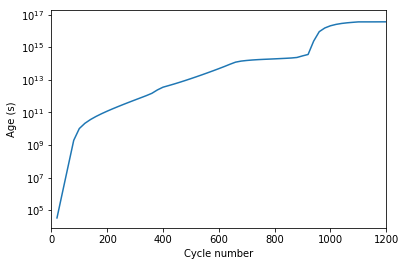

In [76]:
plt.plot(cycle_no,age)
plt.xlabel("Cycle number")
plt.ylabel("Age (s)")
plt.yscale("log")
plt.xlim(0,1200)
plt.show()

You should find that the star's age increases mostly between the first model and model 1000. All the remaining models are needed to calculate the star's very complicated life in its final phase of its evolution -- the asymptotic giant branch. That's a lot of computational effort!

Let's look at the star's abundances in some of the early models. We can extract the radius (in solar radii) and mass (in solar masses) of each *meshpoint* for a given cycle with the following commands:

In [41]:
mass = data.se.get(1000,'mass')
radius = data.se.get(1000,'radius')

 reading ['radius']...100%

It is also possible to extract the density ('rho') and temperature ('temperature') in the same way. The list data also contain the abundances of the isotopes at each meshpoint. Let's extract some of these as well. I can extract isotopes individually, or in a group, as follows:

In [42]:
h1 = data.se.get(1000,'H-1')
he4 = data.se.get(1000,'He-4')
c12,n14,o16 = data.se.get(1000,('C-12','N-14','O-16'))

 reading ['iso_massf']...100%

You should now try plotting up these abundances as a function of mass. You will need to use a log scale if you plot up multiple abundances at the same time because they are often very different. You might like to try plotting up some of the isotopes from the other proton-burning cycles we learned about in the lecture.

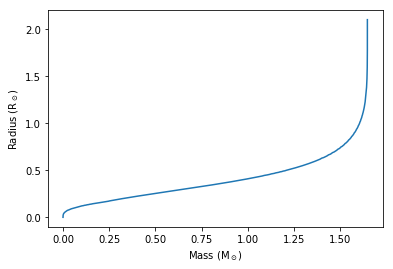

In [43]:
plt.plot(mass,radius)
plt.xlabel("Mass (M$_\odot$)")
plt.ylabel("Radius (R$_\odot$)")
plt.show()

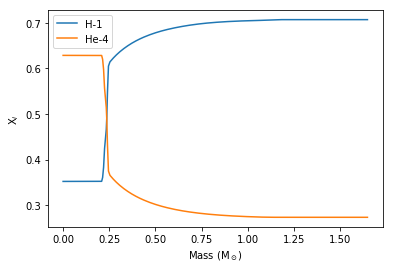

In [44]:
plt.plot(mass,h1,label="H-1")
plt.plot(mass,he4,label="He-4")
plt.legend()
plt.xlabel("Mass (M$_\odot$)")
plt.ylabel("X$_i$")
plt.show()

You now have all the commands you need to explore the data set. Let's test your understanding with the following questions:

1. When does the star run out of hydrogen at the centre? Give both the cycle number and the age.
2. Which of the CNO isotopes is most abundant at the point when hydrogen is exhausted?
3. Find the central temperature at the point when helium burning begins in the core.

### Question 1: easy way

 reading ['mass']...100%

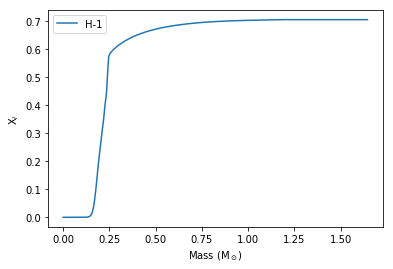

In [45]:
model_no = 1200
h1 = data.se.get(model_no,'H-1')
mass = data.se.get(model_no,'mass')

plt.plot(mass,h1,label="H-1")
plt.legend()
plt.xlabel("Mass (M$_\odot$)")
plt.ylabel("X$_i$")
plt.yscale('linear')
plt.show()

### The better way

 reading ['iso_massf']...100%

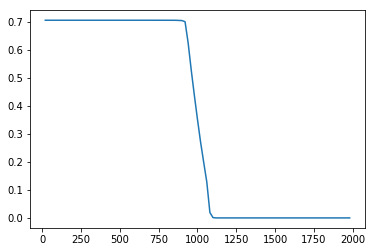

In [46]:
short_cycle = cycle_no[0:99]


central_H1 = []
for i in short_cycle:
    h1_temp = data.se.get(i,'H-1')
    central_H1.append(h1_temp[0])
    
plt.plot(short_cycle,central_H1)
plt.show()

In [47]:
central_H1.index(min(central_H1))
H_exhaustion_age = age[59]
print("Cycle number at H exhaustion is",cycle_no[59])
print("Age at H exhaustion is",H_exhaustion_age/3.14e7/1e9,"Gyrs")

Cycle number at H exhaustion is 1200
Age at H exhaustion is 1.9649530721473174 Gyrs


### Question 2:

 reading ['mass', 'iso_massf']...100%

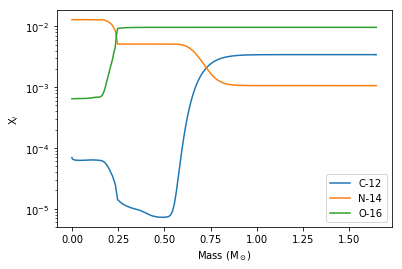

The N-14 abundance is 0.012874556512881528


In [48]:
mass, c12, n14, o16 = data.se.get(1200,("mass","C-12","N-14","O-16"))

plt.plot(mass,c12,label="C-12")
plt.plot(mass,n14,label="N-14")
plt.plot(mass,o16,label="O-16")

plt.legend()
plt.xlabel("Mass (M$_\odot$)")
plt.ylabel("X$_i$")
plt.yscale('log')
plt.show()

print("The N-14 abundance is",n14[0])

### Question 3:

 reading ['mass']...100%

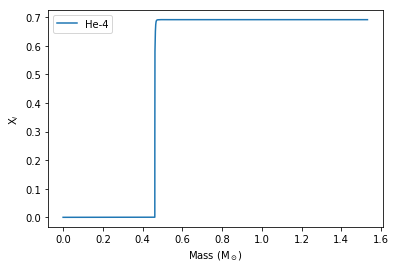

In [49]:
model_no = 14760
h1 = data.se.get(model_no,'H-1')
mass = data.se.get(model_no,'mass')

plt.plot(mass,h1,label="He-4")
plt.legend()
plt.xlabel("Mass (M$_\odot$)")
plt.ylabel("X$_i$")
plt.show()

In [50]:
temperature = data.se.get(model_no,'temperature')
temperature[0]

 reading ['temperature']...100%

0.012369088458552486

Text(0, 0.5, 'Temperature (GK)')

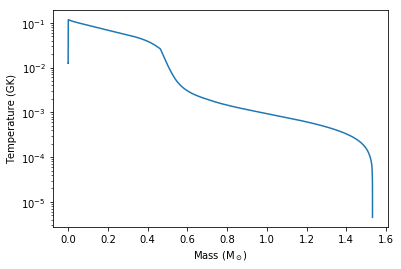

In [51]:
plt.plot(mass,temperature)
plt.yscale('log')

plt.xlabel("Mass (M$_\odot$)")
plt.ylabel("Temperature (GK)")

## Step 3: Explore!

Now its over to you! You should now have all the tools you need to examine the data. Choose a different mass of star from the one we looked at above, and see what happens to it! Your aim is to determine how the total mass of various elements (focus on H, He, C, N, O, Ne, Mg, Si and Fe) vary over time in your model. Try to plot up their total masses as a function of time. You will need to do a reasonable amount of data manipulation before you can do this however! Think about what steps you will need to go through to make the calculations, and what functions you might need to create along the way.

Here is how I approached the problem. 

In [52]:
# I need to store the total mass of the isotope -- I will end up having to reset this each time I calculate the sum
total_mass = 0
# I need to read in an abundance profile, and a mass profile -- if I plan ahead, I can use the mass for multiple different isotopes for the same cycle
X = data.se.get(1,"C-12")
mass = data.se.get(1,"mass")
# In the for loop, I will perform the sum
for i in range(len(mass)):
# I don't have an i-1 for the first mesh point -- it would be the centre of the star where the mass is zero, so dm is just mass[0]
    if i == 0:
        dm = mass[i]
    else:
        dm = mass[i] - mass[i-1]
# sum the mass of material in this box with the others "+=""
    total_mass += dm*X[i]

 reading ['mass']...100%

I will now put this into a function, so that I can call a list of isotopes

In [53]:
def sum_isotopes(list_of_isotopes,cycle_number):
    mass_of_element = 0
# I have included the cycle number because I will want to call this multiple times
    for isotope in list_of_isotopes:
        total_mass = 0
        X = data.se.get(cycle_number,isotope)
        mass = data.se.get(cycle_number,"mass")
        for i in range(len(mass)):
            if i == 0:
                dm = mass[i]
            else:
                dm = mass[i] - mass[i-1]
# sum the mass of material in this box with the others "+=""
            total_mass += dm*X[i]
        mass_of_element += total_mass
    return mass_of_element

Now I want to apply this to all the cycle numbers. I will append the result of the sum to a new list, so that I can plot it up against cycle number or age

In [54]:
element_mass = []
isotope_list = ['N-14','N-15']

for cycle in cycle_no[::10]:
    element_mass.append(sum_isotopes(isotope_list,cycle))

 reading ['mass']...100%

Next, I will extend this to all the isotopes I want to plot:

In [55]:
# hydrogen
element_mass = []
isotope_list = ['H-1','H-2']

for cycle in cycle_no[::10]:
    element_mass.append(sum_isotopes(isotope_list,cycle))
    
H_mass = element_mass

# helium
element_mass = []
isotope_list = ['He-3','He-4']

for cycle in cycle_no[::10]:
    element_mass.append(sum_isotopes(isotope_list,cycle))
    
He_mass = element_mass

# carbon
element_mass = []
isotope_list = ['C-12','C-13']

for cycle in cycle_no[::10]:
    element_mass.append(sum_isotopes(isotope_list,cycle))
    
C_mass = element_mass

# nitrogen
element_mass = []
isotope_list = ['N-14','N-15']

for cycle in cycle_no[::10]:
    element_mass.append(sum_isotopes(isotope_list,cycle))
    
N_mass = element_mass

# oxygen
element_mass = []
isotope_list = ['O-16','O-17','O-18']

for cycle in cycle_no[::10]:
    element_mass.append(sum_isotopes(isotope_list,cycle))
    
O_mass = element_mass

# neon
element_mass = []
isotope_list = ['Ne-20','Ne-21','Ne-22']

for cycle in cycle_no[::10]:
    element_mass.append(sum_isotopes(isotope_list,cycle))
    
Ne_mass = element_mass

# magnesium
element_mass = []
isotope_list = ['Mg-24','Mg-25','Mg-26']

for cycle in cycle_no[::10]:
    element_mass.append(sum_isotopes(isotope_list,cycle))
    
Mg_mass = element_mass

# Silicon
element_mass = []
isotope_list = ['Si-28','Si-29','Si-30']

for cycle in cycle_no[::10]:
    element_mass.append(sum_isotopes(isotope_list,cycle))
    
Si_mass = element_mass

# Iron
element_mass = []
isotope_list = ['Fe-54','Fe-56','Fe-57','Fe-58']

for cycle in cycle_no[::10]:
    element_mass.append(sum_isotopes(isotope_list,cycle))
    
Fe_mass = element_mass

 reading ['mass']...100%

In [56]:
# convert age in seconds to years
age_years = []
age_left = []
for time in age:
    age_years.append(time/(60*60*24*365))
    # it is often useful to plot as a function of time till the end of the star's life -- it allows you to focus on the later, more rapid stages
    age_left.append((age[-1] - time)/(60*60*24*365))

The above uses a nice Python trick to avoid me having to read in everything. I have asked Python to use a 'slice' giving me every 10th entry in the list cycle_no -- this is what cycle_no[::10] means.

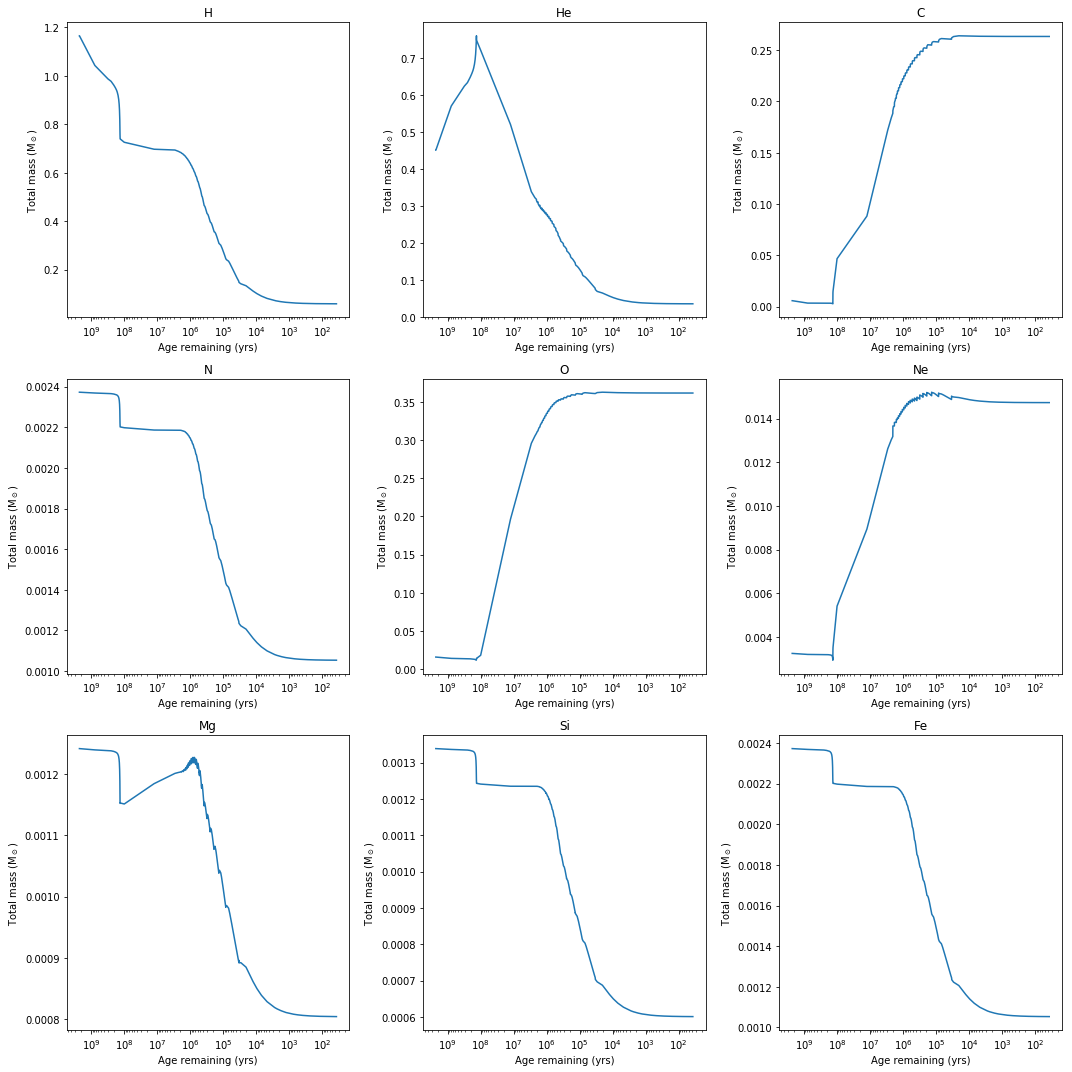

In [57]:
fig, axs = plt.subplots(3, 3, figsize=(15,15))
axs[0, 0].plot(age_left[::10], H_mass)
axs[0, 0].set_title('H')
axs[0, 1].plot(age_left[::10], He_mass)
axs[0, 1].set_title('He')
axs[0, 2].plot(age_left[::10], C_mass)
axs[0, 2].set_title('C')
axs[1, 0].plot(age_left[::10], element_mass)
axs[1, 0].set_title('N')
axs[1, 1].plot(age_left[::10], O_mass)
axs[1, 1].set_title('O')
axs[1, 2].plot(age_left[::10], Ne_mass)
axs[1, 2].set_title('Ne')
axs[2, 0].plot(age_left[::10], Mg_mass)
axs[2, 0].set_title('Mg')
axs[2, 1].plot(age_left[::10], Si_mass)
axs[2, 1].set_title('Si')
axs[2, 2].plot(age_left[::10], Fe_mass)
axs[2, 2].set_title('Fe')

for ax in axs.flat:
    ax.set(xlabel='Age remaining (yrs)', ylabel='Total mass (M$_\odot$)')
    ax.set_xscale('log')
    ax.invert_xaxis()

plt.tight_layout()
plt.show()

Can you explain the physics of what you see?

There are two factors to take into account: 1) the nucleosynthesis taking place, 2) the mass being lost from the star. The plots are a combination of both. Mass loss can be seen in the iron plot -- remember low mass stars cannot produce iron -- so the changes you see here are due to the star losing mass. First there is a small amount of mass loss on the red giant branch. The second phase of mass loss is on the asymptotic giant branch, where the star loses all its surface material, eventually becoming just a carbon/oxygen white dwarf.

Now that I have the necessary code to do the plotting, it would be nice to put all our routines together into a function (or really a set of functions), so that all we have to do is supply the path to the data and Python will do the rest. 

In [58]:
# function for plotting

def plot_element_masses(element_mass_list,age_left,n):
    fig, axs = plt.subplots(3, 3, figsize=(15,15))
    axs[0, 0].plot(age_left[::n], element_mass_list[0])
    axs[0, 0].set_title('H')
    axs[0, 1].plot(age_left[::n], element_mass_list[1])
    axs[0, 1].set_title('He')
    axs[0, 2].plot(age_left[::n], element_mass_list[2])
    axs[0, 2].set_title('C')
    axs[1, 0].plot(age_left[::n], element_mass_list[3])
    axs[1, 0].set_title('N')
    axs[1, 1].plot(age_left[::n], element_mass_list[4])
    axs[1, 1].set_title('O')
    axs[1, 2].plot(age_left[::n], element_mass_list[5])
    axs[1, 2].set_title('Ne')
    axs[2, 0].plot(age_left[::n], element_mass_list[6])
    axs[2, 0].set_title('Mg')
    axs[2, 1].plot(age_left[::n], element_mass_list[7])
    axs[2, 1].set_title('Si')
    axs[2, 2].plot(age_left[::n], element_mass_list[8])
    axs[2, 2].set_title('Fe')

    for ax in axs.flat:
        ax.set(xlabel='Age remaining (yrs)', ylabel='Total mass (M$_\odot$)')
        ax.set_xscale('log')
        ax.invert_xaxis()

    plt.tight_layout()
    plt.show()
    return

In [59]:
# load the basic data -- cycle numbers etc.

def load_cycle_data(data_list):
    cycles = data_list.se.cycles
    temp_cycle_no = [int(i) for i in cycles]
    temp_age = data_list.se.get(cycles,'age')
    # convert age in seconds to years
    temp_age_years = []
    temp_age_left = []
    for time in temp_age:
        temp_age_years.append(time/(60*60*24*365))
        temp_age_left.append((temp_age[-1] - time)/(60*60*24*365))
        
    return temp_cycle_no, temp_age, temp_age_years, temp_age_left

In [60]:
# read in the element masses -- because I will use lists of lists, I can do all the calculations with just a few lines of code instead of the 9 separate chunks I used above. 
# Isn't Python great? ;-)

def calculate_element_masses(temp_list_of_isotopes,list_of_cycles,data_list):
    temp_element_mass_list = []
    for isotope_list in temp_list_of_isotopes:
        element_mass = []
    

        for cycle in list_of_cycles:
            element_mass.append(sum_isotopes2(isotope_list,cycle,data_list))
    
        temp_element_mass_list.append(element_mass)
    return temp_element_mass_list

In [61]:
# I have created a new version of the sum_isotope function that takes the new data_list as an argument
def sum_isotopes2(list_of_isotopes,cycle_number,data_list):
    mass_of_element = 0
# I have included the cycle number because I will want to call this multiple times
    for isotope in list_of_isotopes:
        total_mass = 0
        X = data_list.se.get(cycle_number,isotope)
        mass = data_list.se.get(cycle_number,"mass")
        for i in range(len(mass)):
            if i == 0:
                dm = mass[i]
            else:
                dm = mass[i] - mass[i-1]
# sum the mass of material in this box with the others "+=""
            total_mass += dm*X[i]
        mass_of_element += total_mass
    return mass_of_element

In [62]:
# Here is a list of the isotope lists we will need. I want to use lists of lists to save on lines of code reading and calculating the elements.
list_of_isotope_lists = [('H-1','H-2'),('He-3','He-4'),('C-12','C-13'),('N-14','N-15'),('O-16','O-17','O-18'),('Ne-20','Ne-21','Ne-22'),('Mg-24','Mg-25','Mg-26'),('Si-28','Si-29','Si-30'),('Fe-54','Fe-56','Fe-57','Fe-58')]

We have now defined all the functions we need: all we have to do is load in the data and call our new functions. Let's try this for the next model:

In [63]:
# select the new model and load the data

chosen_mass = "M2.00Z2.0e-02.standard"
file_name = path_to_data + "/" + chosen_mass + "/H5_out"
data2 = mp.se(file_name)

Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools


 reading ['mass']...100%

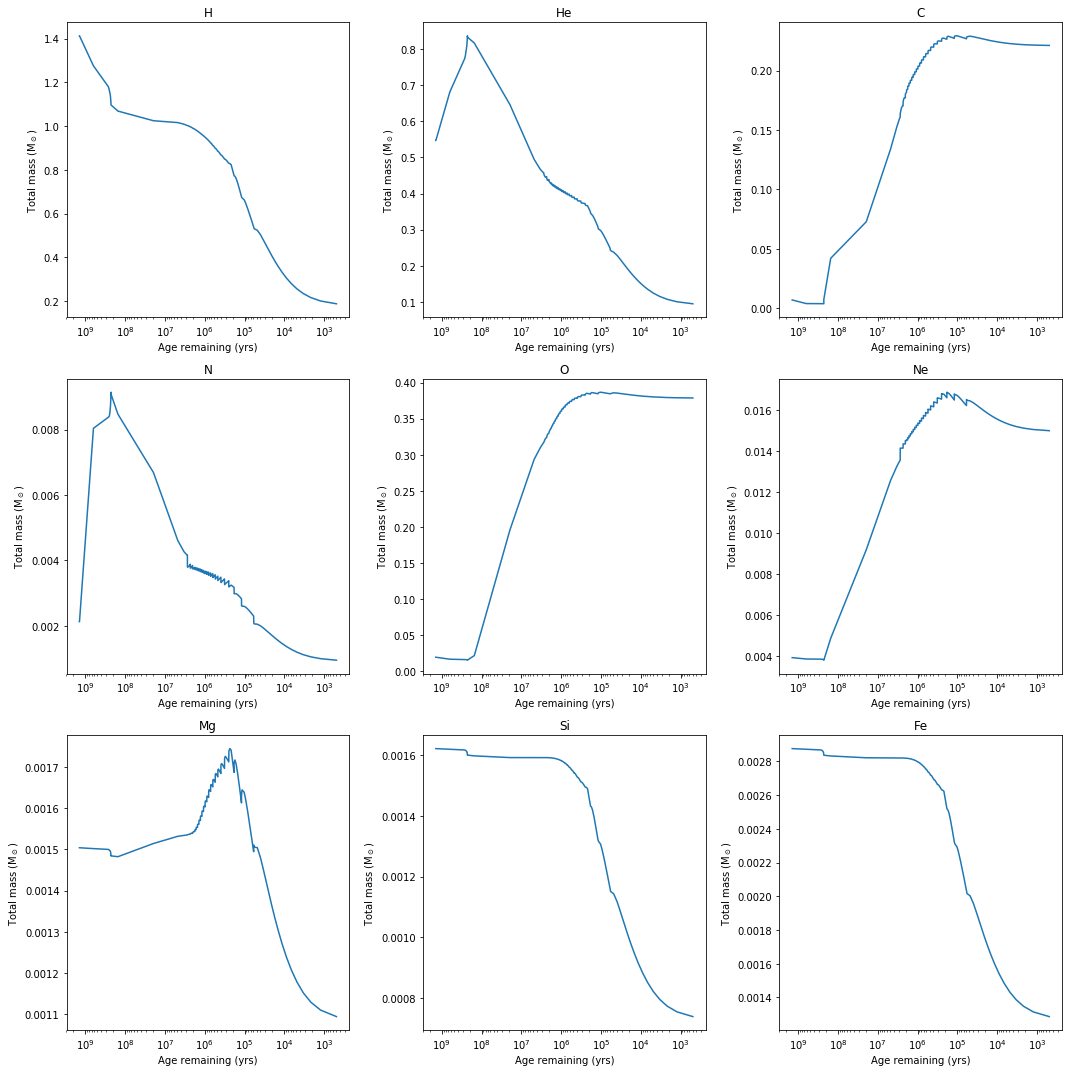

In [64]:
# run our new functions
cycle_no, age, age_years, age_left = load_cycle_data(data2)
# use cycle_no[::n] to select every nth cycle
n = 10
element_mass_list = calculate_element_masses(list_of_isotope_lists,cycle_no[::n],data2)
plot_element_masses(element_mass_list,age_left,n)

Do not worry if you don't reach this point!

## Step 4: Too easy?

So you got your plots made and can tell us all about element production in your star. If you'd like a tougher challenge, try making an animation of how the star's abundances are varying as a function of mass. Plot abundance as a function of mass, for each cycle in your data file and combine them into an animation.

You will need to read up on python's animation module to do this! Good luck :-)

To use animations, we need to load the animation module from matplotlib:

In [65]:
from matplotlib import animation

Making animations is then a three step process. First, we set up the figure that we eventually want to plot, including the axes and whatever data we want. The last part of this involves making a call to plot with empty lists.

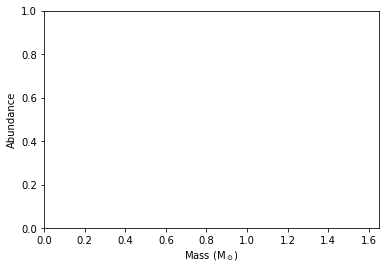

In [92]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 1.65), ylim=(0, 1))

plt.ylabel("Abundance")
plt.xlabel("Mass (M$_\odot$)")

line_to_plot, = ax.plot([], [])

Next we define an initializing function. This will be called by the animation function and tells it which parts of the plot don't change: this saves on file size as we only store the bits of the plot that are actually changing.

In [93]:
def init():
    line_to_plot.set_data([], [])
    return line_to_plot,

Now we need a function that will be called for each frame of the movie. I will choose every 10th cycle for now. (Note that hard-coding this into the function isn't the best idea -- passing an argument that determines the frequency of plotting). Also, I have hard-coded in that we are using the original list 'data' from the first part of the notebook. Again it would be better to pass the data into function as an argument.

In [94]:
def animate(i):
    temp_cycle = 20+10*i
    temp_mass = data.se.get(temp_cycle,"mass")
    temp_H1 = data.se.get(temp_cycle,"H-1")
    line_to_plot.set_data(temp_mass, temp_H1)
    return line_to_plot,

Finally, we can call the animation function. The option blit tells the animation function to only replot the bits of the figure that have changed. I also have to choose the number of frames to plot (one cycle per frame in this case), making sure that I don't run out of cycles -- this is one reason why hard-coding the frequency of plotting wasn't a good idea.

In [96]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=20, blit=True)

anim.save('My_movie.gif', writer='imagemagick')

plt.show()

 reading ['iso_massf']...100%

You can now download and watch your animated gif (try opening it in a web browser, for example).

The animation function can also handle text labels too, so that you can also add cycle numbers or ages to the plot that update with each frame.